#Import required libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Loding data

In [2]:
Books=pd.read_excel(r"C:\Users\Asad shaikh\Books.xlsx")
Ratings=pd.read_excel(r"C:\Users\Asad shaikh\Ratings.xlsx")
Users=pd.read_excel(r"C:\Users\Asad shaikh\Users.xlsx")

In [3]:
Books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

#Exploratory Data Analysis

In [4]:
#Data information
print(Books.info())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271356 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [5]:
print(Ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1048575 non-null  int64  
 1   ISBN         1048574 non-null  object 
 2   Book-Rating  1048568 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.0+ MB
None


In [6]:
print(Users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278785 entries, 0 to 278784
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   User-ID     278785 non-null  int64 
 1   Location    278783 non-null  object
 2   Age         168070 non-null  object
 3   Unnamed: 3  108 non-null     object
 4   Unnamed: 4  64 non-null      object
 5   Unnamed: 5  2 non-null       object
dtypes: int64(1), object(5)
memory usage: 12.8+ MB
None


In [7]:
#Descriptive Statistics
print(Books.describe(include='all'))

             ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count      271360          271356           271358               271360   
unique     271360          242130           102022                  118   
top     195153448  Selected Poems  Agatha Christie                 2002   
freq            1              27              632                17627   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16806                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
freq               

In [8]:
print(Ratings.describe(include='all'))

             User-ID         ISBN   Book-Rating
count   1.048575e+06    1048574.0  1.048568e+06
unique           NaN     322931.0           NaN
top              NaN  971880107.0           NaN
freq             NaN       2264.0           NaN
mean    1.285089e+05          NaN  2.879888e+00
std     7.421876e+04          NaN  3.857869e+00
min     2.000000e+00          NaN  0.000000e+00
25%     6.339400e+04          NaN  0.000000e+00
50%     1.288350e+05          NaN  0.000000e+00
75%     1.927790e+05          NaN  7.000000e+00
max     2.788540e+05          NaN  1.000000e+01


In [9]:
print(Users.describe(include='all'))





              User-ID                         Location       Age Unnamed: 3  \
count   278785.000000                           278783  168070.0        108   
unique            NaN                            57302     218.0         39   
top               NaN  london, england, united kingdom      24.0       usa"   
freq              NaN                             2505    5680.0         18   
mean    139431.995240                              NaN       NaN        NaN   
std      80499.675975                              NaN       NaN        NaN   
min          1.000000                              NaN       NaN        NaN   
25%      69718.000000                              NaN       NaN        NaN   
50%     139431.000000                              NaN       NaN        NaN   
75%     209147.000000                              NaN       NaN        NaN   
max     278858.000000                              NaN       NaN        NaN   

        Unnamed: 4 Unnamed: 5  
count         64.0 

In [10]:


Books.shape

(271360, 8)

In [11]:
Users.shape

(278785, 6)

In [12]:
Ratings.shape

(1048575, 3)

In [13]:


Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [14]:
#Check for null values
print(Books.isnull().sum())

ISBN                   0
Book-Title             4
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [15]:
# Handle null values in 'Book-Title' values with Unknown
Books['Book-Title'].fillna("Unknown", inplace=True)

#Fill missing 'Publisher' values with 'Unknown'
Books['Publisher'].fillna('Unknown', inplace=True)

#Fill missing 'Book-Author' values with 'Unknown Author'
Books['Book-Author'].fillna('Unknown Author', inplace=True)

#Drop rows where 'Year-Of-Publication' is null
#Books['Year-Of-Publication'] = pd.to_numeric(Books['Year-Of-Publication'], errors='coerce')

#Convert to numerical values
#Books['Year-Of-Publication'] = Books['Year-Of-Publication'].fillna(Books['Year-Of-Publication'].mean()).astype(int)


print(Books.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [16]:
import pandas as pd
import datetime

# 1. Remove datetime.datetime values — replace them with NaN
Books['Year-Of-Publication'] = Books['Year-Of-Publication'].apply(
    lambda x: pd.NA if isinstance(x, datetime.datetime) else x
)

# 2. Convert everything to numeric, coercing errors to NaN
Books['Year-Of-Publication'] = pd.to_numeric(Books['Year-Of-Publication'], errors='coerce')

# 3. Remove extreme outlier years (like 0 or future years beyond 2025)
Books.loc[
    (Books['Year-Of-Publication'] < 1500) | (Books['Year-Of-Publication'] > 2025),
    'Year-Of-Publication'
] = pd.NA

# ✅ 4. Now it's safe to run numeric operations!
print(Books['Year-Of-Publication'].describe())

count    266725.000000
mean       1993.692571
std           8.148275
min        1806.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2024.000000
Name: Year-Of-Publication, dtype: float64


In [17]:
median_year = Books['Year-Of-Publication'].median()
Books['Year-Of-Publication'].fillna(median_year, inplace=True)

In [18]:
Books['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984., 1968., 1961., 1958., 1974., 1976., 1971., 1977., 1975.,
       1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966., 1920.,
       1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969., 1954.,
       1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923., 2020.,
       1939., 1926., 1938., 1911., 1904., 1949., 1932., 1928., 1929.,
       1927., 1931., 1914., 1934., 1910., 1933., 1902., 1924., 1921.,
       1900., 1944., 1917., 1901., 2010., 1908., 1906., 1935., 1806.,
       2021., 2012., 2006., 1909., 2008., 1919., 1922., 1897., 2024.])

In [19]:
#Check for duplicates
print(Books.duplicated().sum())

0


In [20]:
Users.head()

,User-ID,Location,Age,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1,"nyc, new york, usa",NaN,NaN,NaN,NaN
1,2,"stockton, california, usa",18,NaN,NaN,NaN
2,3,"moscow, yukon territory, russia",NaN,NaN,NaN,NaN
3,4,"porto, v.n.gaia, portugal",17,NaN,NaN,NaN
4,5,"farnborough, hants, united kingdom",NaN,NaN,NaN,NaN


In [21]:
print(Users.isnull().sum())

User-ID            0
Location           2
Age           110715
Unnamed: 3    278677
Unnamed: 4    278721
Unnamed: 5    278783
dtype: int64


In [22]:
# Handle null values in 'Location' values with Unknown
Users['Location'].fillna("Unknown", inplace=True)
print(Users.isnull().sum())

User-ID            0
Location           0
Age           110715
Unnamed: 3    278677
Unnamed: 4    278721
Unnamed: 5    278783
dtype: int64


In [23]:
#Dropping columns
if any(col in Users.columns for col in ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']):
    Users.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1, inplace=True)
else:
    print("Columns 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5' not found in DataFrame.")
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",NaN


In [24]:
#Fill missing ages with the median age and Converted 'Age' column to numeric
Users['Age'] = pd.to_numeric(Users['Age'], errors='coerce')
median_age = Users['Age'].median()
Users['Age'].fillna(median_age, inplace=True)
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",32.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",32.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",32.0


In [25]:
#Check for duplicates
print(Users.duplicated().sum())

0


In [26]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,155061224,5.0
2,276727,446520802,0.0
3,276729,052165615X,3.0
4,276729,521795028,6.0


In [27]:
print(Ratings.isnull().sum())

User-ID        0
ISBN           1
Book-Rating    7
dtype: int64


In [28]:
# Fill null values of book ratings with 0
Ratings['Book-Rating'].fillna(0, inplace=True)

# Fill missing 'ISBN' values with 'Unknown'
Ratings['ISBN'].fillna('Unknown', inplace=True)
print(Ratings.isnull().sum())

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [29]:
#Check for duplicates
print(Ratings.duplicated().sum())

24


In [30]:
#Drop duplicate values
Ratings.drop_duplicates(inplace=True)

#Check for duplicates
print(Ratings.duplicated().sum())

0


In [31]:
Books.shape

(271360, 8)

In [32]:
Book_Count_df=pd.DataFrame(Books['Book-Title'].value_counts())

In [33]:
Book_Count_df.reset_index(inplace=True)

In [34]:
Book_Count_df

,Book-Title,count
0,Selected Poems,27
1,Little Women,24
2,Wuthering Heights,21
3,Dracula,20
4,Adventures of Huckleberry Finn,20
...,...,...
242126,What Every Kid Should Know,1
242127,The Seventh Enemy (A Brady Coyne Mystery),1
242128,A Brace of Skeet,1
242129,"The Yellow Admiral (O'Brian, Patrick, Aubrey/M...",1


In [35]:
User_Rating_Count=pd.DataFrame(Ratings['User-ID'].value_counts())

In [36]:
User_Rating_Count.reset_index(inplace=True)

In [37]:

User_Rating_Count

,User-ID,count
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850
...,...,...
95508,105002,1
95509,105008,1
95510,105014,1
95511,105023,1


#Data Visualization

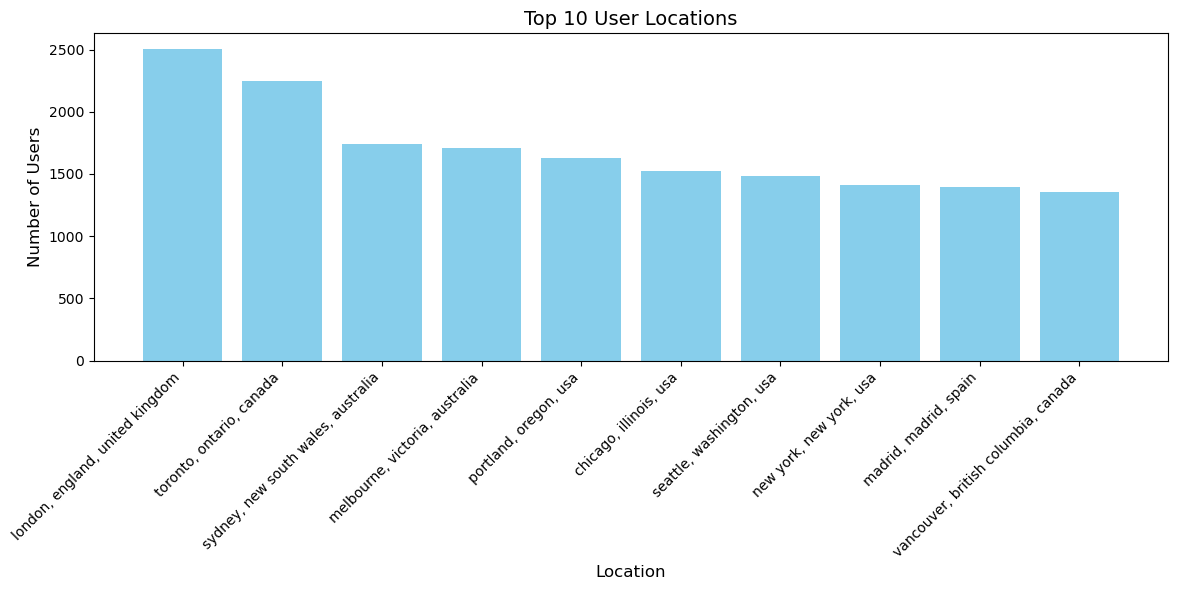

In [38]:
#Bar char for top 10 user location
location_counts = Users['Location'].value_counts()
top_locations = location_counts.head(10)
locations = top_locations.index.tolist()
counts = top_locations.values.tolist()

plt.figure(figsize=(12, 6))
plt.bar(locations, counts, color='skyblue')
plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.title("Top 10 User Locations", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

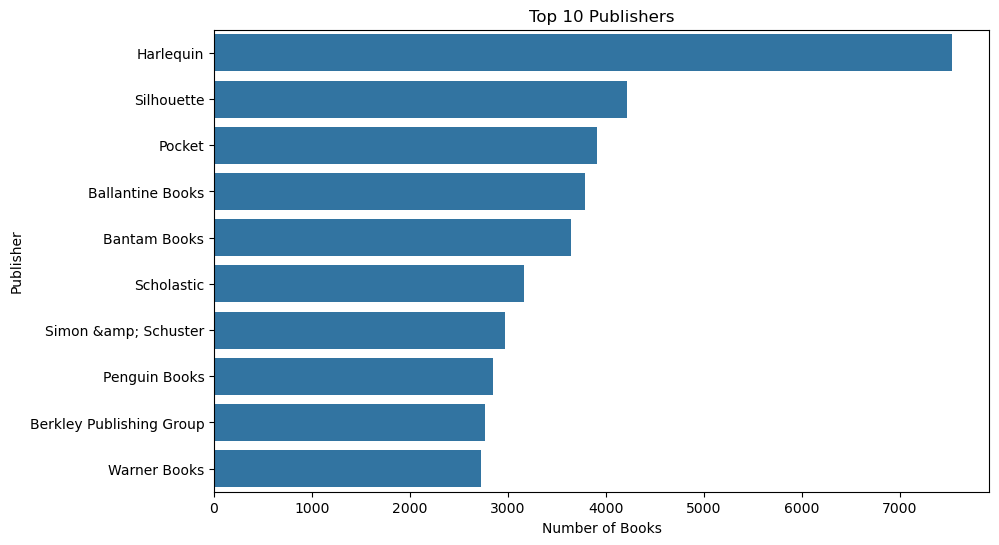

In [39]:
# Top 10 Publishers with the most books
top_publishers = Books['Publisher'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.title("Top 10 Publishers")
plt.show()

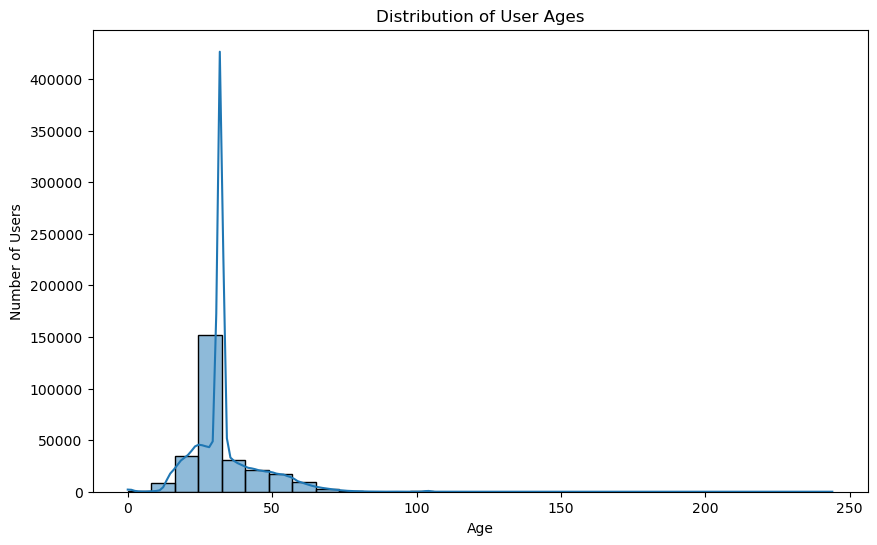

In [40]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(Users['Age'], bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Distribution of User Ages')
plt.show()

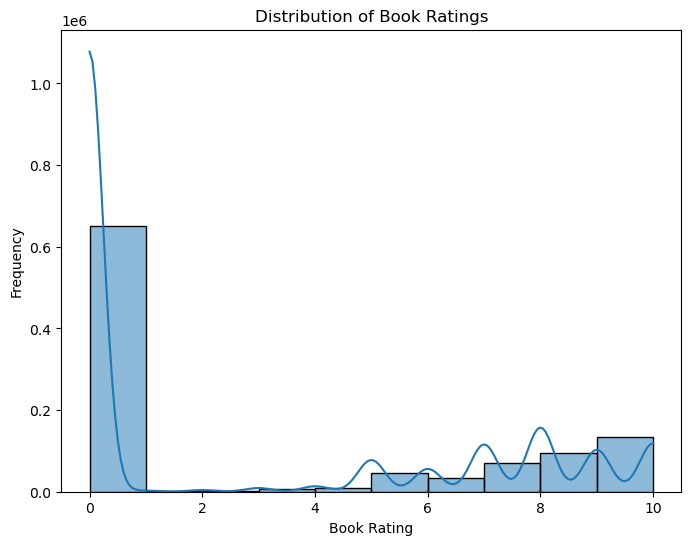

In [41]:
# Distribution of Book Ratings
plt.figure(figsize=(8, 6))
sns.histplot(Ratings['Book-Rating'], bins=10, kde=True)
plt.xlabel("Book Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Book Ratings")
plt.show()

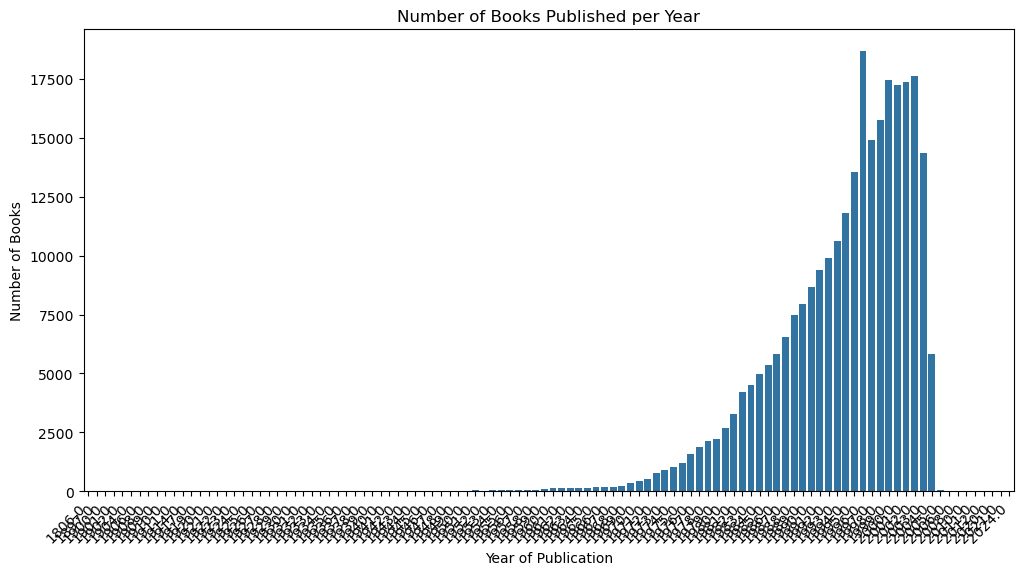

In [42]:
# Number of Books Published per Year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year-Of-Publication', data=Books)
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books")
plt.title("Number of Books Published per Year")
plt.xticks(rotation=45, ha="right")
plt.show()

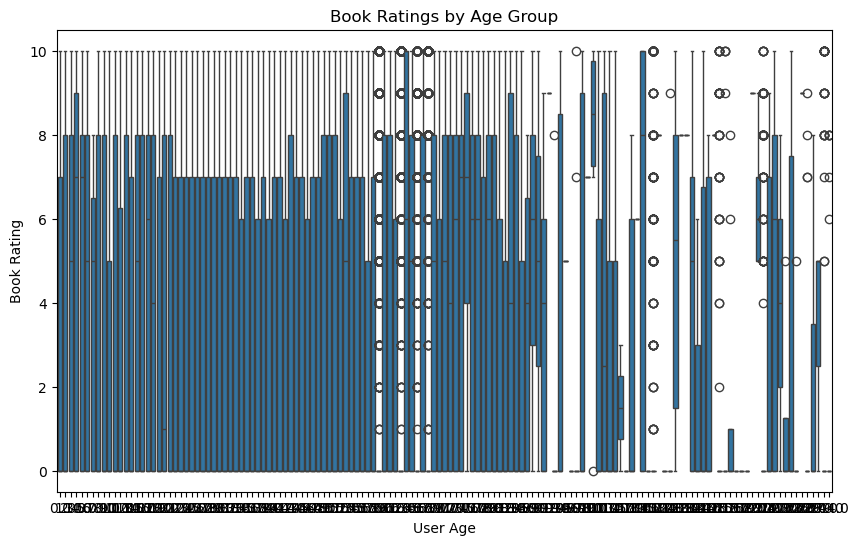

In [43]:
# Box plot of Book Ratings by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Book-Rating', data=pd.merge(Users, Ratings, on='User-ID', how='inner'))
plt.xlabel('User Age')
plt.ylabel('Book Rating')
plt.title('Book Ratings by Age Group')
plt.show()

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)


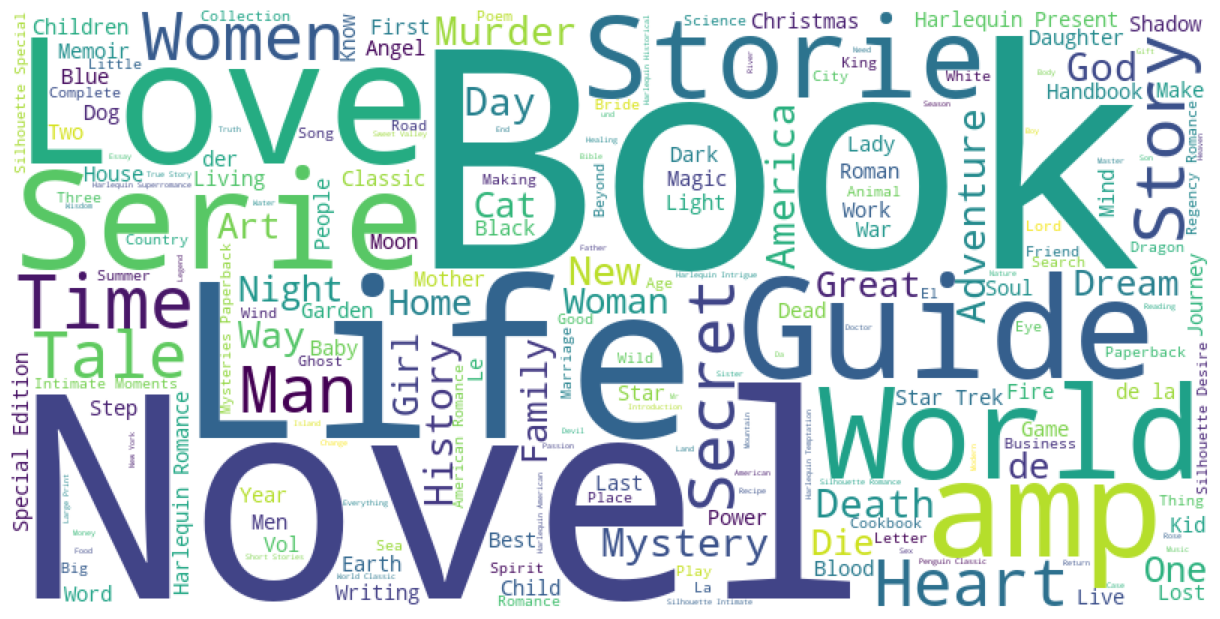

In [44]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'Books' DataFrame is available from the previous code

text = " ".join(str(title) for title in Books['Book-Title'])
stopwords = set(STOPWORDS)
stopwords.update(["unknown", "the", "a", "of", "in", "to", "and"]) # Add more common words here
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(12, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#Model Building

Popularity Based Recommender System

In [45]:
Books.sort_values(by='Year-Of-Publication')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
171817,781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806.0,Reprint Services Corp,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...
245607,781268001,"Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...",Silas Weir Mitchell,1897.0,Reprint Services Corp,http://images.amazon.com/images/P/0781268001.0...,http://images.amazon.com/images/P/0781268001.0...,http://images.amazon.com/images/P/0781268001.0...
211854,1551103982,The Cycling Adventures of Coconut Head: A Nort...,Ted Schredd,1900.0,Graphic Arts Center Pub Co,http://images.amazon.com/images/P/1551103982.0...,http://images.amazon.com/images/P/1551103982.0...,http://images.amazon.com/images/P/1551103982.0...
256444,B00009NDBF,Help Yourself: Celebrating the Rewards of Resi...,David J. Pelzer,1900.0,E P Dutton,http://images.amazon.com/images/P/B00009NDBF.0...,http://images.amazon.com/images/P/B00009NDBF.0...,http://images.amazon.com/images/P/B00009NDBF.0...
108555,B0000VZEFK,Is That a Gun in Your Pocket?: Women's Experie...,Rachel Abramowitz,1900.0,Random House,http://images.amazon.com/images/P/B0000VZEFK.0...,http://images.amazon.com/images/P/B0000VZEFK.0...,http://images.amazon.com/images/P/B0000VZEFK.0...
...,...,...,...,...,...,...,...,...
30010,068160204X,The Royals,Kitty Kelley,2020.0,Bausch &amp; Lombard,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...
92156,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020.0,Bausch &amp; Lombard,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...
238817,068471941X,LOOK HOMEWARD ANGEL,T Wolfe,2020.0,Scribner Paper Fiction,http://images.amazon.com/images/P/068471941X.0...,http://images.amazon.com/images/P/068471941X.0...,http://images.amazon.com/images/P/068471941X.0...
183769,590085417,Heidi,Johanna Spyri,2021.0,Scholastic,http://images.amazon.com/images/P/0590085417.0...,http://images.amazon.com/images/P/0590085417.0...,http://images.amazon.com/images/P/0590085417.0...


In [46]:
Books[Books['Year-Of-Publication'] > 2000]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...
12,887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...
21,1841721522,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001.0,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...
...,...,...,...,...,...,...,...,...
271349,520242335,Strong Democracy : Participatory Politics for ...,Benjamin R. Barber,2004.0,University of California Press,http://images.amazon.com/images/P/0520242335.0...,http://images.amazon.com/images/P/0520242335.0...,http://images.amazon.com/images/P/0520242335.0...
271350,762412119,"Burpee Gardening Cyclopedia: A Concise, Up to ...",Allan Armitage,2002.0,Running Press Book Publishers,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...
271351,1582380805,Tropical Rainforests: 230 Species in Full Colo...,"Allen M., Ph.D. Young",2001.0,Golden Guides from St. Martin's Press,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...
271352,1845170423,Cocktail Classics,David Biggs,2004.0,Connaught,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...


In [47]:
ratings_with_name = Ratings.merge(Books, on='ISBN')

In [48]:
ratings_with_name.applymap(type).nunique()

User-ID                1
ISBN                   2
Book-Rating            1
Book-Title             4
Book-Author            2
Year-Of-Publication    1
Publisher              3
Image-URL-S            1
Image-URL-M            1
Image-URL-L            2
dtype: int64

In [49]:
cols_to_clean = ['ISBN', 'Book-Title', 'Book-Author', 'Publisher']

for col in cols_to_clean:
    ratings_with_name[col] = ratings_with_name[col].astype(str)

In [50]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
230215,ÿ¿l- Connection.,1
230216,ÿ¿lpiraten.,2
230217,ÿ¿rger mit Produkt X. Roman.,4
230218,ÿ¿stlich der Berge.,2


Dataframe for storing average rating of each book

In [51]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,Beyond IBM: Leadership Marketing and Finance ...,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,0.00
...,...,...
230215,ÿ¿l- Connection.,0.00
230216,ÿ¿lpiraten.,0.00
230217,ÿ¿rger mit Produkt X. Roman.,5.25
230218,ÿ¿stlich der Berge.,4.00


In [52]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,1,0.00
...,...,...,...
230215,ÿ¿l- Connection.,1,0.00
230216,ÿ¿lpiraten.,2,0.00
230217,ÿ¿rger mit Produkt X. Roman.,4,5.25
230218,ÿ¿stlich der Berge.,2,4.00


To recommend popular books we select only those books which have got more than 250 votes then rank the books according to average rating.

In [53]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [54]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [55]:
popular_df = popular_df.merge(Books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [56]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'

In [57]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 1000)

In [58]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg,346,5.945087
2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg,380,5.884211
5,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg,316,5.544304
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg,501,5.177645
12,The Hobbit : The Enchanting Prelude to The Lord of the Rings,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.01.MZZZZZZZ.jpg,261,4.969349
13,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg,519,4.938343
15,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg,340,4.885294
24,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.01.MZZZZZZZ.jpg,463,4.684665
32,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,828,4.679952
38,The Catcher in the Rye,J.D. Salinger,http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg,401,4.615960


# **Collaborative Filtering Based Recommender System**

In [59]:
#Selecting Users who have rated more than 200 books
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
x

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 83643, dtype: bool

In [60]:
wellread_users = x[x].index
wellread_users.shape

(737,)

In [61]:
#Selecting entries from ratings_with_name dataframe only rated by Users in wellread_users
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(wellread_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1153,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
1154,277427,26217457,0.0,Vegetarian Times Complete Cookbook,Lucy Moll,1995.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0026217457.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0026217457.01.LZZZZZZZ.jpg
1155,277427,003008685X,8.0,Pioneers,James Fenimore Cooper,1974.0,Thomson Learning,http://images.amazon.com/images/P/003008685X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/003008685X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/003008685X.01.LZZZZZZZ.jpg
1156,277427,30615321,0.0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982.0,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0030615321.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0030615321.01.LZZZZZZZ.jpg
1157,277427,60002050,0.0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002.0,Avon Books,http://images.amazon.com/images/P/0060002050.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060002050.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060002050.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
941101,250764,451410777,0.0,Sleep Tight (Onyx Book),Anne Frasier,2003.0,Onyx Books,http://images.amazon.com/images/P/0451410777.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0451410777.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0451410777.01.LZZZZZZZ.jpg
941102,250764,452264464,8.0,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume,http://images.amazon.com/images/P/0452264464.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0452264464.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0452264464.01.LZZZZZZZ.jpg
941103,250764,048623715X,0.0,Glamorous Movie Stars of the Thirties: Paper Dolls,Tom Tierney,1982.0,Dover Publications,http://images.amazon.com/images/P/048623715X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/048623715X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/048623715X.01.LZZZZZZZ.jpg
941104,250764,486256588,0.0,Schiaparelli Fashion Review: Paper Dolls in Full Color,Tom Tierney,1988.0,Dover Publications,http://images.amazon.com/images/P/0486256588.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0486256588.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0486256588.01.LZZZZZZZ.jpg


In [62]:
#Selecting only those books which have more than 50 ratings
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=40
y

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
ÿngeles fugaces (Falling Angels)                                                                              False
ÿ¿ber das Fernsehen.                                                                                          False
ÿ¿ber die Pflicht zum Ungehorsam gegen den Staat.            

In [63]:
famous_books = y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '2nd Chance',
       '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=903)

In [64]:
famous_books.shape

(903,)

In [65]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [66]:
#Making pivot table of User ratings on Books taking Index as Book-Titles and Columns as User-ID
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,249111,249628,249862,249894,250184,250405,250764,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
pt.fillna(0,inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,249111,249628,249862,249894,250184,250405,250764,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#Making a list containing lists of similarity scores of each book with every other book
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)
similarity_scores

array([[1.        , 0.11013674, 0.0520656 , ..., 0.12447747, 0.07552261,
        0.04645965],
       [0.11013674, 1.        , 0.03500142, ..., 0.07780233, 0.1752651 ,
        0.12821608],
       [0.0520656 , 0.03500142, 1.        , ..., 0.14221586, 0.        ,
        0.        ],
       ...,
       [0.12447747, 0.07780233, 0.14221586, ..., 1.        , 0.07085128,
        0.02054493],
       [0.07552261, 0.1752651 , 0.        , ..., 0.07085128, 1.        ,
        0.11104108],
       [0.04645965, 0.12821608, 0.        , ..., 0.02054493, 0.11104108,
        1.        ]])

In [69]:
similarity_scores.shape

(903, 903)

In [70]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = Books[Books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [71]:
recommend('Midnight')

[['Winter Moon',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0553582933.01.MZZZZZZZ.jpg'],
 ['Dark Rivers of the Heart',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/034539657X.01.MZZZZZZZ.jpg'],
 ['The Funhouse',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425142485.01.MZZZZZZZ.jpg'],
 ['Shadowfires',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425136981.01.MZZZZZZZ.jpg']]

In [72]:
recommend('1st to Die: A Novel')

[['Along Came a Spider (Alex Cross Novels)',
  'James Patterson',
  'http://images.amazon.com/images/P/0446364193.01.MZZZZZZZ.jpg'],
 ['Lightning',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425115801.01.MZZZZZZZ.jpg'],
 ['On the Street Where You Live',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671004530.01.MZZZZZZZ.jpg'],
 ['All Around the Town',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671793489.01.MZZZZZZZ.jpg']]

In [73]:
recommend('4 Blondes')

[['The House of the Spirits',
  'Isabel Allende',
  'http://images.amazon.com/images/P/0553273914.01.MZZZZZZZ.jpg'],
 ['Pleading Guilty',
  'Scott Turow',
  'http://images.amazon.com/images/P/0446365505.01.MZZZZZZZ.jpg'],
 ['Bridget Jones: The Edge of Reason',
  'Helen Fielding',
  'http://images.amazon.com/images/P/0140298479.01.MZZZZZZZ.jpg'],
 ['Seabiscuit',
  'LAURA HILLENBRAND',
  'http://images.amazon.com/images/P/0345465083.01.MZZZZZZZ.jpg']]

In [74]:
recommend('You Belong To Me')

[["I'll Be Seeing You",
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671888587.01.MZZZZZZZ.jpg'],
 ['Loves Music, Loves to Dance',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671758896.01.MZZZZZZZ.jpg'],
 ["Daddy's Little Girl",
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0743206045.01.MZZZZZZZ.jpg'],
 ['Before I Say Good-Bye',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671004573.01.MZZZZZZZ.jpg']]

In [75]:
import pickle
pickle.dump(pt, open('pt.pkl', 'wb'))
pickle.dump(similarity_scores, open('similarity_scores.pkl', 'wb'))